<a href="https://colab.research.google.com/github/mediarahan/UTSMachineLearning/blob/main/Achmad_Rionov_1103204030_UTS_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library dan Dataset Breast Cancer

In [3]:
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = datasets.load_breast_cancer()

import matplotlib


## Preprocess Data

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

# remove any rows with missing data
df.dropna(inplace=True)

# convert the target column to a categorical variable
df['target'] = pd.Categorical(df['target'])

# normalize the feature columns
df.iloc[:, :-1] = (df.iloc[:, :-1] - df.iloc[:, :-1].mean()) / df.iloc[:, :-1].std()

# print the first 5 rows of the DataFrame
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.096100     -2.071512        1.268817   0.983510         1.567087   
1     1.828212     -0.353322        1.684473   1.907030        -0.826235   
2     1.578499      0.455786        1.565126   1.557513         0.941382   
3    -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4     1.748758     -1.150804        1.775011   1.824624         0.280125   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.280628        2.650542             2.530249       2.215566   
1         -0.486643       -0.023825             0.547662       0.001391   
2          1.052000        1.362280             2.035440       0.938859   
3          3.399917        1.914213             1.450431       2.864862   
4          0.538866        1.369806             1.427237      -0.009552   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

## Visualisasi dan Perbandingan Data menggunakan Scatter Plot

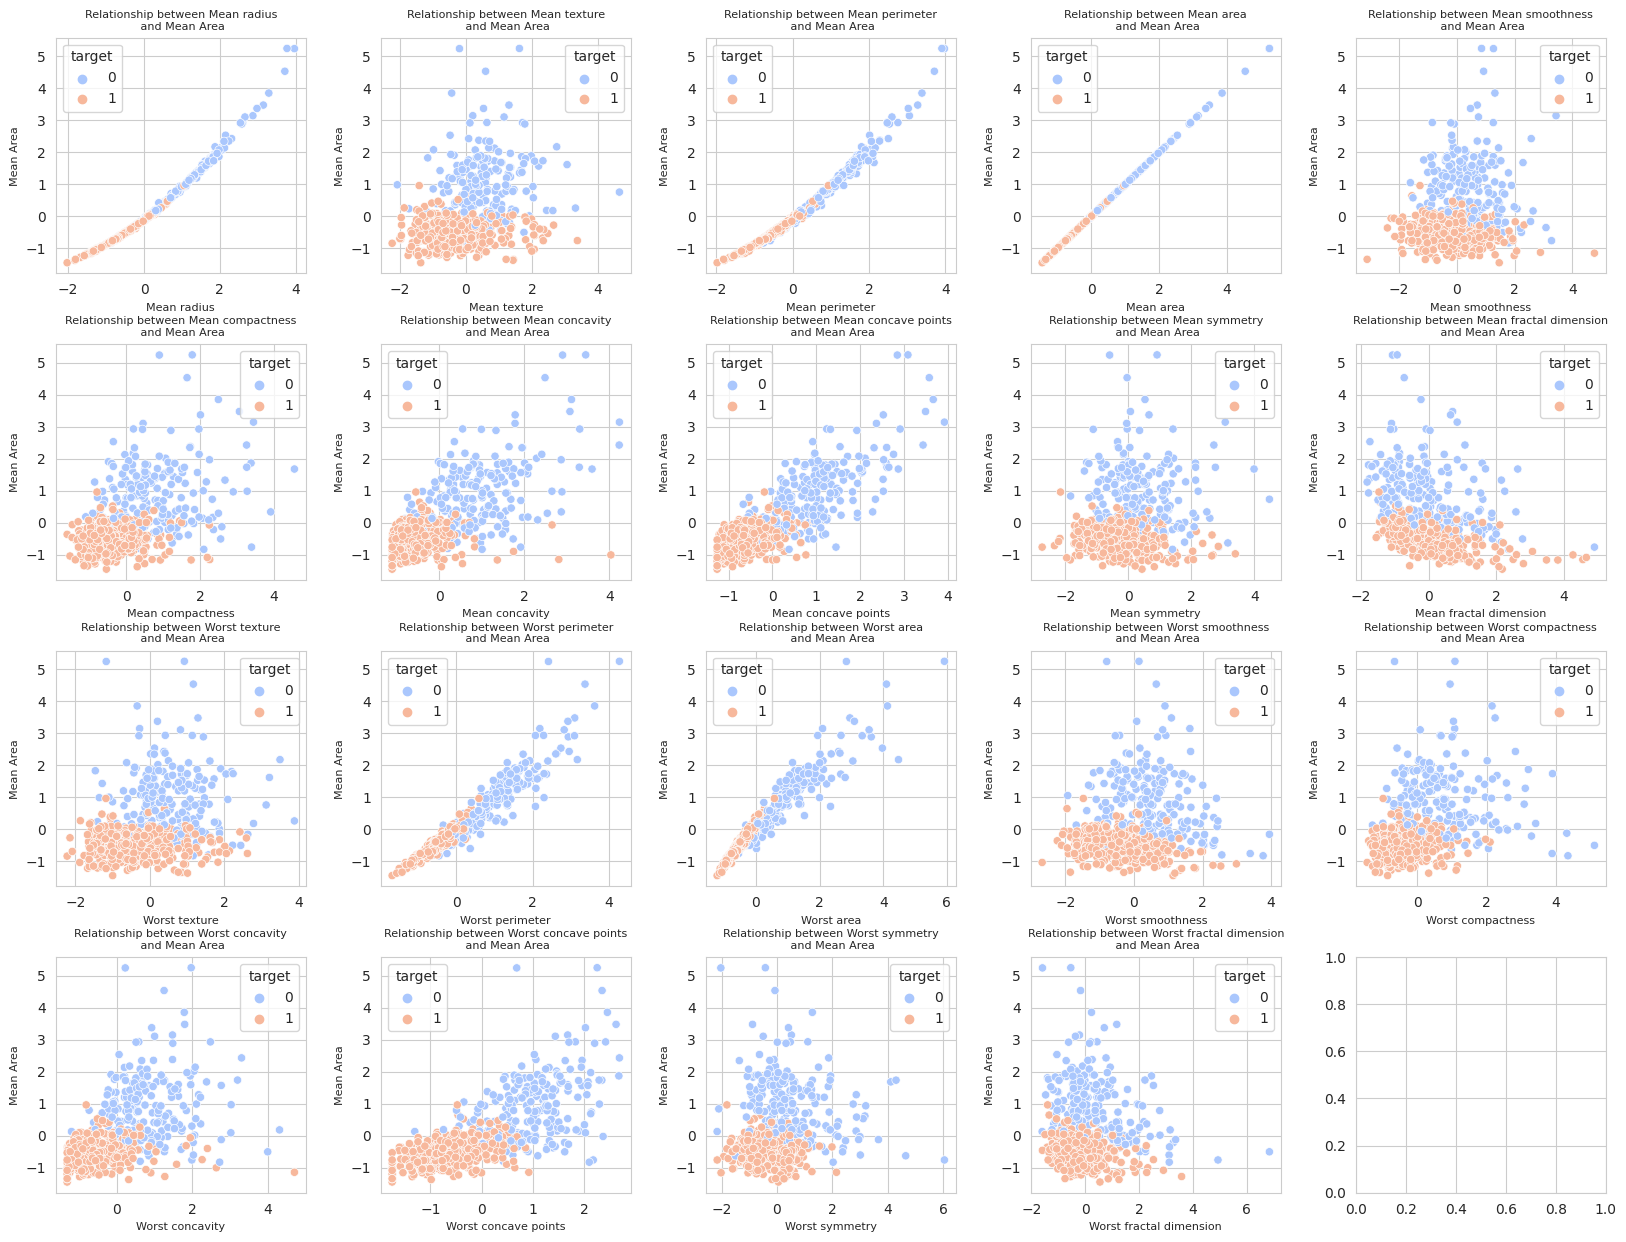

<Figure size 640x480 with 0 Axes>

In [ ]:
important_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
                      'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry',
                      'mean fractal dimension', 'worst texture', 'worst perimeter', 'worst area',
                      'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points',
                      'worst symmetry', 'worst fractal dimension']

sns.set_style('whitegrid')

# Set the figure size
fig_width = 20
fig_height = 15
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(fig_width, fig_height))

# Create plots for each feature
for i, feature in enumerate(important_features):
    row = i // 5
    col = i % 5
    ax = axs[row][col]
    sns.scatterplot(x=feature, y='mean area', hue='target', data=df, palette='coolwarm', ax=ax)
    ax.set_title('Relationship between ' + feature.capitalize() + '\n and Mean Area', fontsize=8)
    ax.set_xlabel(feature.capitalize(), fontsize=8)
    ax.set_ylabel('Mean Area', fontsize=8)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

 # Create a distribution plot for the current feature
sns.histplot(x=df[feature], hue=df['target'], palette='coolwarm', kde=True, ax=axs[(row + 2) % 4][col])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.7)

# Show the plot
plt.show()


## Eksplorasi Data - Decision Tree

Accuracy: 0.9473684210526315


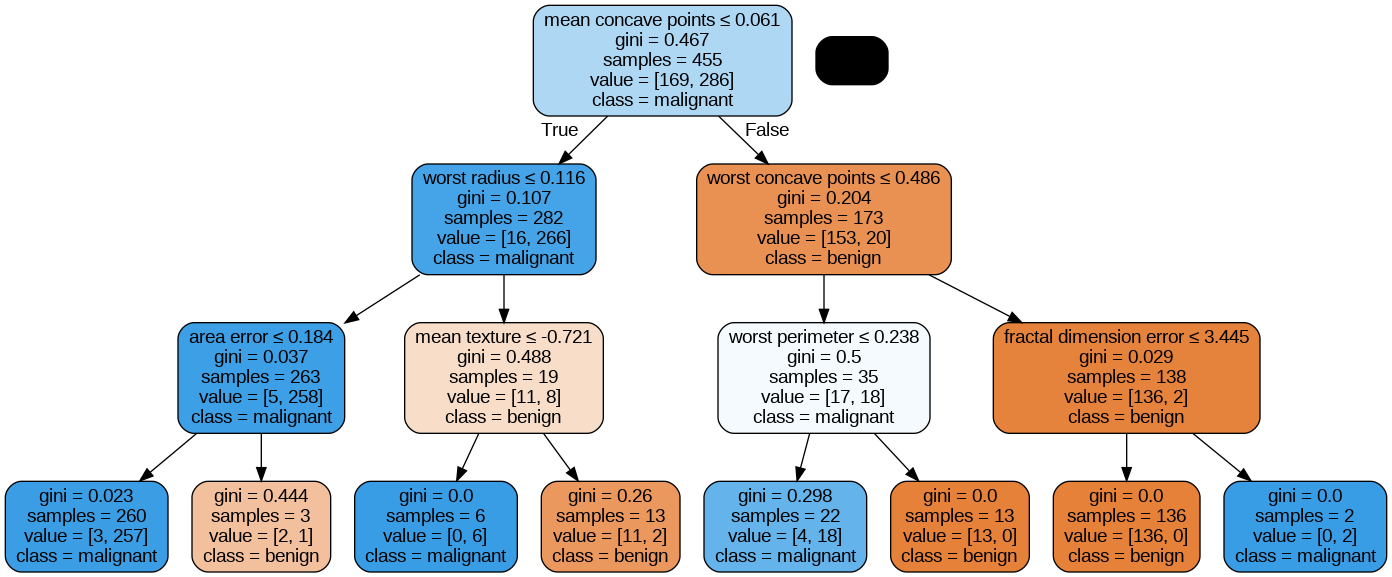

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Train the decision tree model
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


# ==== Visualisasi ====
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Export the decision tree as a DOT file
dot_data = export_graphviz(clf, out_file=None, feature_names=df.columns[:-1], class_names=['benign', 'malignant'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# Convert the DOT file to an image
Image(graph.create_png())




## Eksplorasi Data - Random Forest

[0.04870337 0.01359088 0.05326975 0.04755501 0.00728533 0.01394433
 0.06800084 0.10620999 0.00377029 0.00388577 0.02013892 0.00472399
 0.01130301 0.02240696 0.00427091 0.00525322 0.00938583 0.00351326
 0.00401842 0.00532146 0.07798688 0.02174901 0.06711483 0.15389236
 0.01064421 0.02026604 0.0318016  0.14466327 0.01012018 0.00521012]
Accuracy: 0.9649122807017544
Confusion Matrix: [[40  3]
 [ 1 70]]


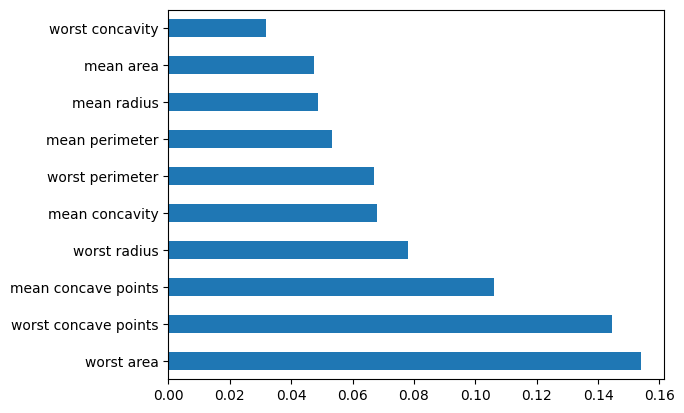

Cross-validation scores: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Average score: 0.9560937742586555


In [11]:
#Import Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

#Split data to training and testing sets
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print(rf.feature_importances_)
y_pred = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

#Visualization
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.show()

#Model Evaluation
cv_scores = cross_val_score(rf, X, y, cv=5)
print('Cross-validation scores:', cv_scores)
print('Average score:', np.mean(cv_scores))






## Eksplorasi Data - Self Training

/usr/local/lib/python3.9/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Self-Training Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94   

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


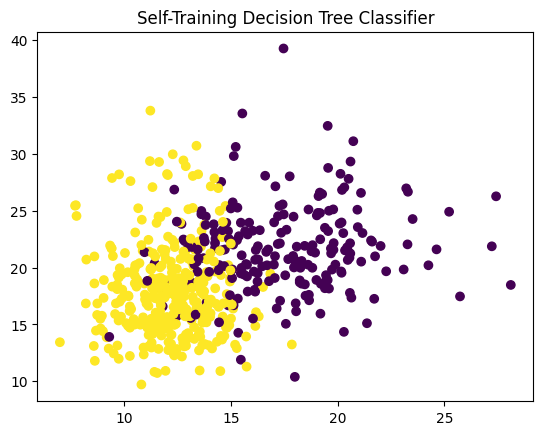

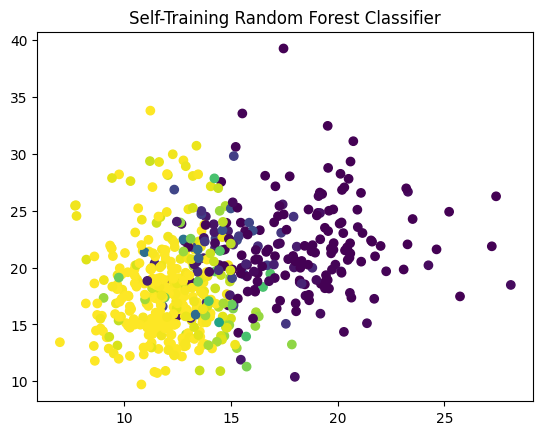

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import classification_report

# Load the dataset
data = load_breast_cancer()

# Split the data into features (X) and labels (y)
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree classifier to the training data
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Fit a random forest classifier to the training data
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

# Apply self-training to the decision tree classifier
self_training_tree = SelfTrainingClassifier(tree)
self_training_tree.fit(X_train, y_train)

# Apply self-training to the random forest classifier
self_training_forest = SelfTrainingClassifier(forest)
self_training_forest.fit(X_train, y_train)

# Use the classifiers to predict the labels of the test data
y_pred_tree = tree.predict(X_test)
y_pred_forest = forest.predict(X_test)
y_pred_self_training_tree = self_training_tree.predict(X_test)
y_pred_self_training_forest = self_training_forest.predict(X_test)

# Print the classification report for the decision tree classifier
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_tree))

# Print the classification report for the random forest classifier
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_forest))

# Print the classification report for the self-training decision tree classifier
print("Self-Training Decision Tree Classifier:")
print(classification_report(y_test, y_pred_self_training_tree))

# Print the classification report for the self-training random forest classifier
print("Self-Training Random Forest Classifier:")
print(classification_report(y_test, y_pred_self_training_forest))

# Visualize the self-training data
X_all = np.concatenate((X_train, X_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)
self_training_tree_scores = self_training_tree.predict_proba(X_all)[:, 1]
self_training_forest_scores = self_training_forest.predict_proba(X_all)[:, 1]
plt.scatter(X_all[:, 0], X_all[:, 1], c=self_training_tree_scores)
plt.title("Self-Training Decision Tree Classifier")
plt.show()

plt.scatter(X_all[:, 0], X_all[:, 1], c=self_training_forest_scores)
plt.title("Self-Training Random Forest Classifier")
plt.show()



## Overview

Decision Tree Classifier Accuracy: 0.9473684210526315
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



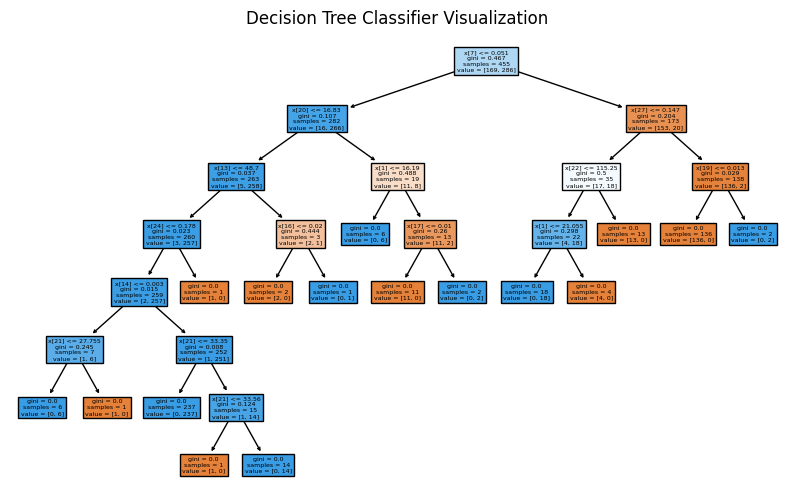

Random Forest Classifier Accuracy: 0.9649122807017544
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



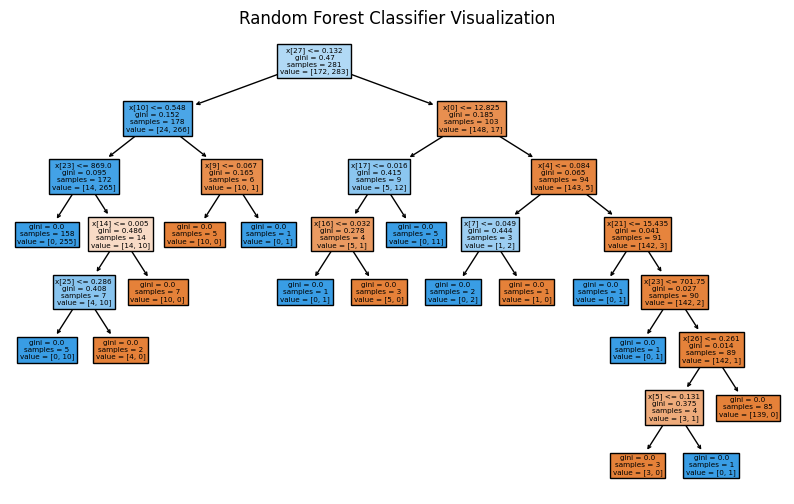

/usr/local/lib/python3.9/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


Self-Training Decision Tree Classifier Accuracy: 0.9473684210526315
Self-Training Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



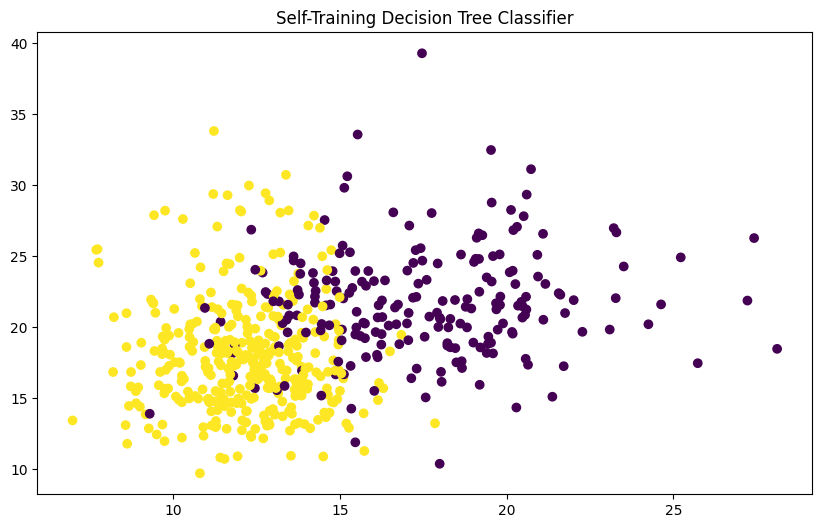

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create decision tree classifier
tree = DecisionTreeClassifier(random_state=42)

# Fit the decision tree classifier to the labeled training data
tree.fit(X_train, y_train)

# Predict the test set labels using the decision tree classifier
tree_pred = tree.predict(X_test)

# Calculate the accuracy score of the decision tree classifier
tree_accuracy = accuracy_score(y_test, tree_pred)

# Print the accuracy score of the decision tree classifier
print("Decision Tree Classifier Accuracy:", tree_accuracy)

# Print the classification report of the decision tree classifier
print("Decision Tree Classifier Classification Report:")
print(classification_report(y_test, tree_pred))

# Visualize the decision tree classifier
plt.figure(figsize=(10, 6))
plot_tree(tree, filled=True)
plt.title("Decision Tree Classifier Visualization")
plt.show()

# Create random forest classifier
forest = RandomForestClassifier(random_state=42)

# Fit the random forest classifier to the labeled training data
forest.fit(X_train, y_train)

# Predict the test set labels using the random forest classifier
forest_pred = forest.predict(X_test)

# Calculate the accuracy score of the random forest classifier
forest_accuracy = accuracy_score(y_test, forest_pred)

# Print the accuracy score of the random forest classifier
print("Random Forest Classifier Accuracy:", forest_accuracy)

# Print the classification report of the random forest classifier
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, forest_pred))

# Visualize the random forest classifier
plt.figure(figsize=(10, 6))
plot_tree(forest.estimators_[0], filled=True)
plt.title("Random Forest Classifier Visualization")
plt.show()

# Create self-training classifier with decision tree base estimator
self_training_tree = SelfTrainingClassifier(tree)

# Fit the self-training classifier to the labeled training data
self_training_tree.fit(X_train, y_train)

# Predict the test set labels using the self-training classifier
self_training_tree_pred = self_training_tree.predict(X_test)

# Calculate the accuracy score of the self-training classifier
self_training_tree_accuracy = accuracy_score(y_test, self_training_tree_pred)

# Print the accuracy score of the self-training classifier
print("Self-Training Decision Tree Classifier Accuracy:", self_training_tree_accuracy)

# Print the classification report of the self-training classifier
print("Self-Training Decision Tree Classifier Classification Report:")
print(classification_report(y_test, self_training_tree_pred))

# Visualize the self-training decision tree classifier
self_training_tree_scores = self_training_tree.predict_proba(X_all)[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(X_all[:, 0], X_all[:, 1], c=self_training_tree_scores)
plt.title("Self-Training Decision Tree Classifier")
plt.show()
